### Oppgave 6 Prediktiv analyse
#### Importerer nødvendige biblioteker

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#### Valg av flyplass, enten ENOL eller ENBO

In [2]:
#airport = "ENBO"
airport = "ENOL"

In [3]:
file_path = f'../data/csv/{airport}_wind_data.csv'
df_airport = pd.read_csv(file_path)

### Predektiv analyse
Ser på to datatyper i forhold til hverandre

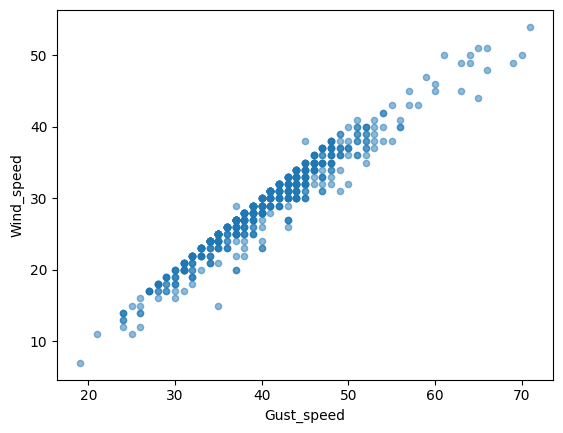

In [4]:
df_airport.plot(kind='scatter', x='Gust_speed', y='Wind_speed', alpha=0.5)
plt.show()

Fjerner alle verdier med NaN

In [5]:
df_clean = df_airport[['Wind_direction', 'Wind_speed', 'Gust_speed', 'Temperature', 'Dewpoint', 'QNH']].dropna()

Vi ser en tydelig sammenheng mellom datatypene

Trener modellen

In [6]:
# Test train split for å lage en modell
X_train, X_test, y_train, y_test = train_test_split(df_clean[['Wind_speed']], df_clean['Gust_speed'])


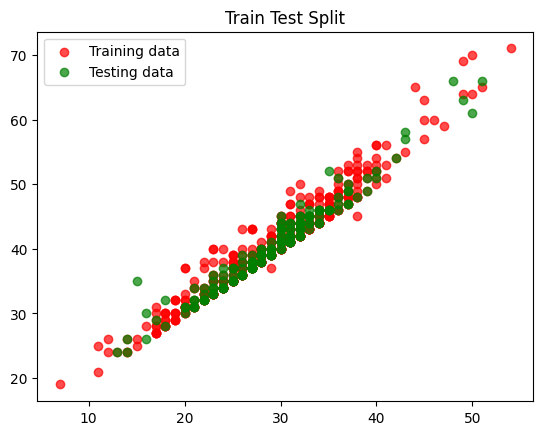

In [7]:
# Test train split visualisering
plt.scatter(X_train, y_train, color='r', label='Training data', alpha=0.7)
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.title('Train Test Split')
plt.show()

In [8]:
# Lager en lineær regresjonsmodell og trener den
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

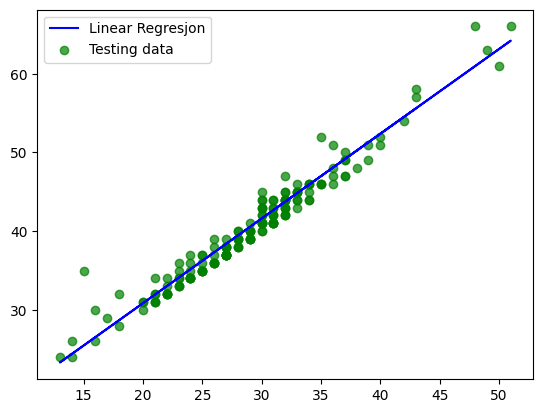

In [9]:
# Bruker modellen til å prediktere test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plotter prediksjonslinje mot test data
plt.plot(X_test, prediction, label='Linear Regresjon', color='b')
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.show()

In [10]:
# tester modellen for et spesifikk gust_speed
test_value = 35
predicted_35_wind_speed = LR.predict(([[test_value]]))
print(f"Tester for wind_speed på {test_value} knop og får predikert Gust_speed på {predicted_35_wind_speed.round(2)} knop.")

Tester for wind_speed på 35 knop og får predikert Gust_speed på [46.99] knop.


In [11]:
# Gir modellen en score
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.9515009818817528

Dette er en veldig god prediksjon, da den høyeste mulige scoren er 1, altså 100%. Denne modellen treffer på 96%, noe vi anser som veldig bra.

#### Videre prediksjon av QNH basert på flere variabler

Trener modellen

In [12]:
# Test train split for å lage en modell
X_train, X_test, y_train, y_test = train_test_split(df_clean['QNH'], df_clean[['Wind_speed']])

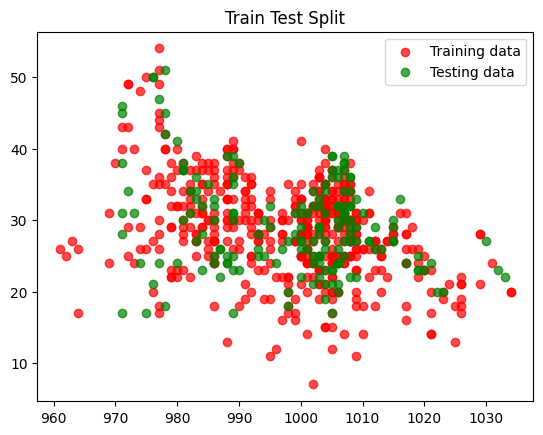

In [13]:
# Test train split visualisering
plt.scatter(X_train, y_train, color='r', label='Training data', alpha=0.7)
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.title('Train Test Split')
plt.show()

In [14]:
# Lager en lineær regresjonsmodell og trener den
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

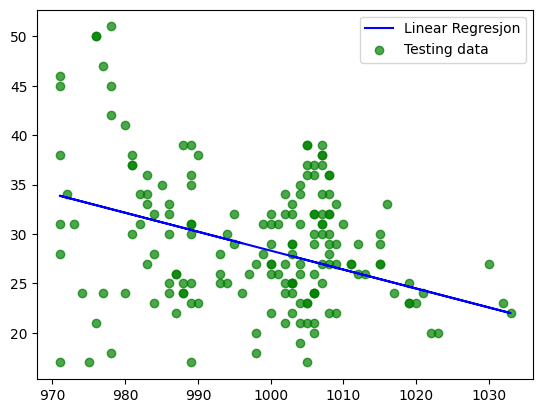

In [15]:
# Bruker modellen til å predikere test data
prediction = LR.predict(X_test.values.reshape(-1,1))

# Plotter prediksjonslinje mot test data
plt.plot(X_test, prediction, label='Linear Regresjon', color='b')
plt.scatter(X_test, y_test, color='g', label='Testing data', alpha=0.7)
plt.legend()
plt.show()

In [16]:
# Gir modellen en score
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.08097004503476735

#### Predikerer vindretning med flere variabler

In [17]:
# Konverterer vindretning til sinus og cosinus
df_clean['Wind_direction_sin'] = np.deg2rad(df_clean['Wind_direction'])
df_clean['Wind_direction_cos'] = np.sin(df_clean['Wind_direction'])
df_clean['Wind_direction_sin'] = np.cos(df_clean['Wind_direction'])

Trener modellen

In [18]:
# Introduserer variablene for å predikere QNH
X = df_clean[['Wind_speed', 'Temperature', 'Dewpoint']]
y_sin = df_clean['Wind_direction_sin']
y_cos = df_clean['Wind_direction_cos']

model_sin = LinearRegression().fit(X, y_sin)
model_cos = LinearRegression().fit(X, y_cos)

In [19]:
# Lager en lineær regresjonsmodell og trener den
y_pred_sin = model_sin.predict(X)
y_pred_cos = model_cos.predict(X)

# Beregner vinkel i randianer
y_pred_angle_rad = np.arctan2(y_pred_sin, y_pred_cos)

# Konverter til grader og gjør en til [0, 360) Konverterer også til integer fra float
y_pred_deg = np.round(np.rad2deg(y_pred_angle_rad) % 360).astype(int)

In [20]:
# Vilkårlig test for å se om det funker
sample_data = df_clean.sample(1)
sample_data

,Wind_direction,Wind_speed,Gust_speed,Temperature,Dewpoint,QNH,Wind_direction_sin,Wind_direction_cos
19,130,39,49.0,-2.0,-10.0,1007,-0.367291,-0.930106


In [21]:
# Henter ut data fra utsnittet.
X_new = pd.DataFrame({
    'Wind_speed': df_clean['Wind_speed'],
    'Temperature': df_clean['Temperature'],
    'Dewpoint': df_clean['Dewpoint']
})


Bergener resultater

In [22]:
# Henter ut faktisk vindretning
actual_dir = sample_data['Wind_direction'].iloc[0]

# Beregner forskjellen med sirkulær vinkelavstand
diff = (actual_dir - y_pred_deg[0] + 180) % 360 - 180
diff = abs(diff)

Resultater av modellen

In [23]:
print(f"Faktisk vindretning: {actual_dir} grader")
print(f"Predikert vindretning: {y_pred_deg[0]} grader")
print(f"Forskjellen mellom predikert og faktisk vindretning: {diff:.2f} grader")

Faktisk vindretning: 130 grader
Predikert vindretning: 193 grader
Forskjellen mellom predikert og faktisk vindretning: 63.00 grader


Vi har tidligere sett at det er liten korrelasjon mellom variablen 'vindretning' og de andre variablene. Dette får vi også bekreftet når vi predikerer vindretningen, og sammenligner den med faktisk vindretning.